<h1><center><span style="border-style:solid;border-width:1px;border-radius:5px;
    padding:5px;background-color:yellow;box-shadow: 6px 6px 6px black;">Mini projet : Jeu du pendu</span></center></h1>

!!! abstract Description
Vous disposez d'un tableau de mots à faire deviner à un joueur. Chaque mauvaise réponse provoque la création d'une étape du "pendu".
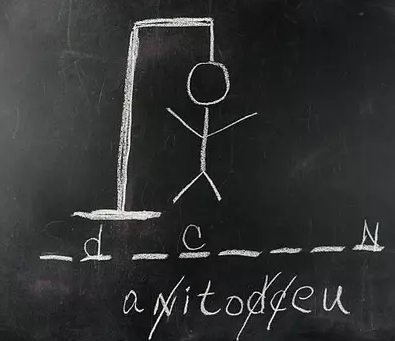
!!!

!!! info Jeu de base : 
Pour commencer nous aurons une version très basique de ce jeu avec une interface graphique élémentaire : 
* une ligne avec le mot à deviner sous la forme de tirets `_`.
* une ligne avec la liste des lettres erronées proposées par l'utilisateur.
* une ligne qui comptabilise le nombre d'erreurs du joueur.   
Le résultat sera similaire à l'image ci-dessous : 
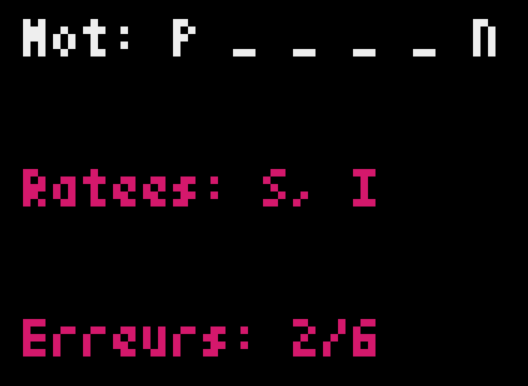

!!!

!!! info Nous aurons à définir quelques fonctions :
* Une fonction qui tire au hasard un mot issu de notre tableau de mots. Une étude rapide de la bibliothèque `random` de python permetra de choisir au hasard un mot à faire deviner.
* Une fonction qui affiche l'état du jeu au fur et à mesure de la partie. Un tableau ne contenant que des `"_"` peut être une représentation du mot à deviner au départ. Exemple si le mot à deviner est `"TOTO"`, le tableau ressemblera à `["_", "_", "_", "_"]`
* une fonction qui demande au joueur une lettre et vérifie si elle est valable : fait-elle partie des 26 lettres majuscules de l'alphabet ? N'a-t-elle pas déjà été proposée ?
!!!

In [1]:
# un tableau de mots à faire deviner (modifiable)
liste_de_mots = ['ANGLE','ARMOIRE','BANC','BUREAU','CABINET','CARREAU','CHAISE','CLASSE',
        'CLEF','COIN','COULOIR','DOSSIER','EAU','ECOLE','ENTRER','ESCALIER','ETAGERE',
        'EXTERIEUR','FENETRE','INTERIEUR','LAVABO','LIT','MARCHE','MATELAS','MATERNELLE']

!!! question Tirer un mot au hasard :
Proposer une fonction `tirage` qui prend en paramètre un tableau de chaines de caractères et qui renvoie une des chaines choisie au hasard.
!!!

In [40]:
from random import choice

def tirage(tab : list) -> str:
    """Tire au sort un mot au hasard"""
    return choice(tab)


mot = tirage(liste_de_mots)

!!! question Tableaux des lettres trouvées et tableau des lettres erronnées :
Construire deux tableaux ci-dessous :   
* `lettres_trouvees` le tableau qui contient autant de `"_"` que de lettres contenu dans le mot tiré au sort.   
* `lettres_ratees` un tableau vide initialement.
!!!

In [8]:
#à compléter
lettres_trouvees = ["_"]*len(mot)
lettres_ratees = []

!!! question Transformer un tableau en chaine de caratères :
Pour notre interface graphique nous allons transformer le contenu des deux tableaux précédents en chaine de caractères.   
Proposer une fonction `tab_to_string` qui prend en paramètre un tableau `tab` et une chaine de caractère `separateur` et qui renvoie une chaine de caratère formatée comme dans les exemples ci-dessous :    
``` python
lettres_trouvees = ['P', '_', '_', '_', '_', 'N']
ma_chaine = tab_to_string(lettres_trouvees, ' ') # le séparateur est un espace
print(ma_chaine)
>>> P _ _ _ _ N
```
ou bien :
``` python
lettres_ratees = ['S', 'I', 'V']
ma_chaine = tab_to_string(lettres_ratees, ', ')
print(ma_chaine)
>>> S, I, V
```
!!!

In [19]:
def tab_to_string(tab : list, separateur : str) -> str :
    joined = ""
    for i in range(len(tab)):
        if i != len(tab) - 1:
            joined += tab[i] + separateur 
        else:
            joined += tab[i]
    return joined
    
print(tab_to_string(lettres_trouvees, " "))

_ _ _ _ _ _ _


!!! question Vérifier la sasie de l'utilisateur :
Proposer une fonction `verifier_lettre` qui prend en paramètre une lettre `lettre` et vérifie si celle-ci se trouve dans le `mot` tiré au sort:      
* Si c'est le cas on la place dans le trableau `lettres_trouvees` en lieu et place d'un `_` pour toutes les occurences de `lettre`.    
* Sinon on rajoute `lettre`dans le tableau `lettres_ratees` si elle n'y est pas déjà.
!!!

In [39]:
def verifier_lettre(lettre : str, mot : str) :
    """
        Vérifie si la lettre fait partie du mot, 
        si oui, on remplace tout les occurences de la lettre dans lettres_trouvees[i] 
        si non, on ajoute la lettres à lettres_ratees, si elle n'y est pas.
    """
    lettre = lettre.upper()
    if lettre in mot:
        for i in range(len(mot)):
            if mot[i] == lettre:
                lettres_trouvees[i] = lettre
    else:
        if lettre not in lettres_ratees:
            lettres_ratees.append(lettre)

In [35]:
# pour tester la fonction :
l = input("saisir une lettre majuscule")
verifier_lettre(l, mot)

print(lettres_trouvees)
print(lettres_ratees)

saisir une lettre majusculed
['C', 'A', '_', '_', 'E', 'A', '_']
['W', 'c', 'B', 'Z', 'D']


!!! question Compter le nombre d'erreurs dans le recherche du mot :
Proposer une fonction qui calcule la quantité de lettre erronnées saisies par l'utilisateur et qui renvoie une chaine de caractère indiquant cette valeur sous la forme : `Erreurs : 0/6`.    
Nous admettons que le nombre limite d'erreurs est de 6.
!!!

In [45]:
def affiche_erreurs() -> str :
    """Retourne le nombre d'erreurs de l'utilisateur"""
    return "Erreurs : " + str(len(lettres_ratees)) + "/6"

In [46]:
affiche_erreurs()

'Erreurs : 5/6'